In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols

In [21]:
plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
df = pd.read_csv('data/unmatch_data.csv',encoding='euc-kr').drop(columns=['Unnamed: 0'])

In [83]:
df.head()

,location,year,month,avg_tem,precip,min_tem,hPa,sun,g_tem,start,climax
0,속초,1989,1,1.5,165.9,-1.5,1023.7,111.6,0.8,286,297
1,속초,1989,2,2.7,65.3,-0.5,1022.4,154.2,1.9,286,297
2,속초,1989,3,5.9,121.7,2.6,1017.0,175.4,6.1,286,297
3,속초,1989,4,12.4,6.2,7.5,1013.3,228.1,14.2,286,297
4,속초,1989,5,16.5,66.8,12.5,1010.6,253.7,18.7,286,297


In [25]:
area1 = (df.location == '해남') & (df.month == 9)
area2 = (df.location == '부산') & (df.month == 9)
area3 = (df.location == '청주') & (df.month == 9)
area4 = (df.location == '철원') & (df.month == 9)
area5 = (df.location == '대구') & (df.month == 9)

heanam = df[area1]
busan = df[area2]
chungju = df[area3]
chulwon = df[area4]
daegu = df[area5]

In [30]:
busan.to_csv('result/busan.csv',encoding='utf-8',index=False)

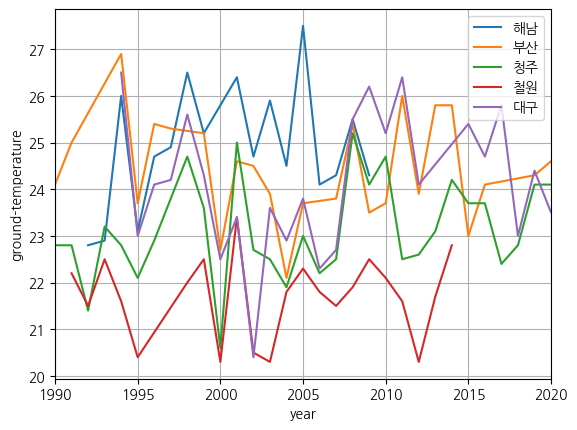

In [98]:
var = 'g_tem'

plt.plot(heanam.year,heanam[var],label='해남')
plt.plot(busan.year,busan[var],label='부산')
plt.plot(chungju.year,chungju[var],label='청주')
plt.plot(chulwon.year,chulwon[var],label='철원')
plt.plot(daegu.year,daegu[var],label='대구')
plt.legend(loc='upper right')
plt.xlim(1990,2020)
plt.xlabel('year')
plt.ylabel('ground-temperature')
plt.grid()
plt.show()

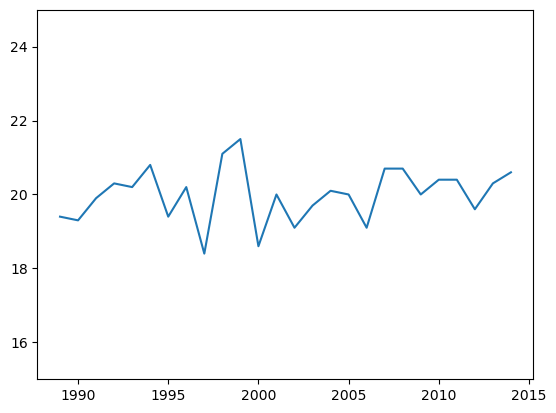

In [14]:
# plt.plot(df2.year,df2.avg_tem)
# plt.ylim(15,25)
# plt.show()

# plt.plot(df2.year,df2.climax)
# plt.ylim(260,320)
# plt.show()

## 상관관계 도표 작성

In [42]:
df = pd.read_csv('data/unmatch_data.csv',encoding='euc-kr').drop(columns=['Unnamed: 0','lon','lat','height','wind'])
df.head()

,location,year,month,avg_tem,precip,min_tem,hPa,sun,g_tem,start,climax
0,속초,1989,1,1.5,165.9,-1.5,1023.7,111.6,0.8,286,297
1,속초,1989,2,2.7,65.3,-0.5,1022.4,154.2,1.9,286,297
2,속초,1989,3,5.9,121.7,2.6,1017.0,175.4,6.1,286,297
3,속초,1989,4,12.4,6.2,7.5,1013.3,228.1,14.2,286,297
4,속초,1989,5,16.5,66.8,12.5,1010.6,253.7,18.7,286,297


In [43]:
area = (df.month == 10) & (df.location == '전주')
# 서울, 속초,보은,대전,전주,대구,목포,부산

df2 = df[area]
df2.columns

Index(['location', 'year', 'month', 'avg_tem', 'precip', 'min_tem', 'hPa',
       'sun', 'g_tem', 'start', 'climax'],
      dtype='object')

In [66]:
df.iloc[:,3:].corr()

,avg_tem,precip,min_tem,hPa,sun,g_tem,start,climax
avg_tem,1.000000,0.596157,0.991110,-0.312230,0.047831,0.990927,0.107392,0.120313
precip,0.596157,1.000000,0.623038,-0.259385,-0.341824,0.570682,0.050661,0.047766
min_tem,0.991110,0.623038,1.000000,-0.283105,-0.018858,0.975949,0.144389,0.169610
hPa,-0.312230,-0.259385,-0.283105,1.000000,-0.038725,-0.339511,0.351146,0.382915
sun,0.047831,-0.341824,-0.018858,-0.038725,1.000000,0.092709,-0.015253,-0.027250
g_tem,0.990927,0.570682,0.975949,-0.339511,0.092709,1.000000,0.083814,0.092619
start,0.107392,0.050661,0.144389,0.351146,-0.015253,0.083814,1.000000,0.845134
climax,0.120313,0.047766,0.169610,0.382915,-0.027250,0.092619,0.845134,1.000000


In [65]:
df[area].iloc[:,3:].corr().iloc[6,7]

0.7004001682910982

In [69]:
lo = ['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '홍성', '제주', '고산',
       '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백', '제천', '보은',
       '천안', '보령', '부여', '금산', '부안', '임실', '정읍', '남원', '장수', '고창군', '장흥',
       '해남', '고흥', '봉화', '영주', '문경', '영덕', '의성', '구미', '영천', '거창', '합천',
       '밀양', '산청', '거제', '남해']
avg_tem_S,precip_S,min_tem_S,hPa_S,sun_S,g_tem_S,climax_S = [],[],[],[],[],[],[]
avg_tem_C,precip_C,min_tem_C,hPa_C,sun_C,g_tem_C,start_C = [],[],[],[],[],[],[]

for i in range(len(lo)):
    area = (df.month == 9) & (df.location == f'{lo[i]}')
    
    avg_tem_S.append(df[area].iloc[:,3:].corr().iloc[6,0])
    precip_S.append(df[area].iloc[:,3:].corr().iloc[6,1])
    min_tem_S.append(df[area].iloc[:,3:].corr().iloc[6,2])
    hPa_S.append(df[area].iloc[:,3:].corr().iloc[6,3])
    sun_S.append(df[area].iloc[:,3:].corr().iloc[6,4])
    g_tem_S.append(df[area].iloc[:,3:].corr().iloc[6,5])
    climax_S.append(df[area].iloc[:,3:].corr().iloc[5,7])
    
for i in range(len(lo)):
    area = (df.month == 9) & (df.location == f'{lo[i]}')
    
    avg_tem_C.append(df[area].iloc[:,3:].corr().iloc[7,0])
    precip_C.append(df[area].iloc[:,3:].corr().iloc[7,1])
    min_tem_C.append(df[area].iloc[:,3:].corr().iloc[7,2])
    hPa_C.append(df[area].iloc[:,3:].corr().iloc[7,3])
    sun_C.append(df[area].iloc[:,3:].corr().iloc[7,4])
    g_tem_C.append(df[area].iloc[:,3:].corr().iloc[7,5])
    start_C.append(df[area].iloc[:,3:].corr().iloc[7,6])
    
    
start = pd.DataFrame({'location':lo,'avg_tem':avg_tem_S,'precip':precip_S,'min_tem':min_tem_S\
                 ,'hPa':hPa_S,'sun':sun_S,'g_tem':g_tem_S,'climax':climax_S})
climax = pd.DataFrame({'location':lo,'avg_tem':avg_tem_C,'precip':precip_C,'min_tem':min_tem_C\
                 ,'hPa':hPa_C,'sun':sun_C,'g_tem':g_tem_C,'climax':start_C})

In [80]:
start.to_csv('result/start_qgis.csv',encoding='cp949',index=False)
climax.to_csv('result/clima_qgis.csv',encoding='cp949',index=False)

In [81]:
cond = start.location == '추풍령'

start[cond]

,location,avg_tem,precip,min_tem,hPa,sun,g_tem,climax
22,추풍령,0.429485,0.504398,0.583371,-0.044083,-0.496005,0.196807,0.096909
